# Inpainting for restoring art pieces
In this Notebook we explore some of the techniques available for image inpainting. Specifically, we set out to test the deep image prior technique, Navier-Stokes based method and the Fast Marching method.

1) First algorithm is based on the paper **"An Image Inpainting Technique Based on the Fast Marching Method"** by Alexandru Telea in 2004. It is based on Fast Marching Method. Consider a region in the image to be inpainted. Algorithm starts from the boundary of this region and goes inside the region gradually filling everything in the boundary first. It takes a small neighbourhood around the pixel on the neighbourhood to be inpainted. This pixel is replaced by normalized weighted sum of all the known pixels in the neighbourhood. Selection of the weights is an important matter. More weightage is given to those pixels lying near to the point, near to the normal of the boundary and those lying on the boundary contours. Once a pixel is inpainted, it moves to next nearest pixel using Fast Marching Method. FMM ensures those pixels near the known pixels are inpainted first, so that it just works like a manual heuristic operation. This algorithm is enabled by using the flag, cv.INPAINT_TELEA.

2) Second algorithm is based on the paper **"Navier-Stokes, Fluid Dynamics, and Image and Video Inpainting"** by Bertalmio, Marcelo, Andrea L. Bertozzi, and Guillermo Sapiro in 2001. This algorithm is based on fluid dynamics and utilizes partial differential equations. Basic principle is heurisitic. It first travels along the edges from known regions to unknown regions (because edges are meant to be continuous). It continues isophotes (lines joining points with same intensity, just like contours joins points with same elevation) while matching gradient vectors at the boundary of the inpainting region. For this, some methods from fluid dynamics are used. Once they are obtained, color is filled to reduce minimum variance in that area. This algorithm is enabled by using the flag, cv.INPAINT_NS.

In [1]:
!pip install matplotlib

### preparation
In this section we prepare image and masks for the inpainting process

The mask was created by: 
1) manually color select damaged are 

2) extend the areas with a brush

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [3]:
img = cv.imread('/home/fmerizzi/Documents/image_inpainting/detail2.png')
mask = cv.imread('/home/fmerizzi/Documents/image_inpainting/detail2_mask.png',0)

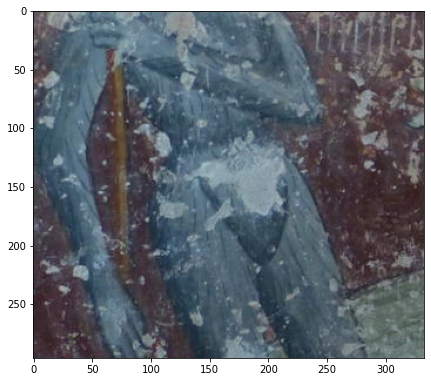

In [4]:
plt.figure(figsize = (7,7))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB),)

In [5]:
#check that the mask is 1 channel imahe
mask.shape

(296, 333)

In [6]:
mask[1:100]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,  29, 216, 255],
       [255, 255, 255, ..., 199, 255, 255]], dtype=uint8)

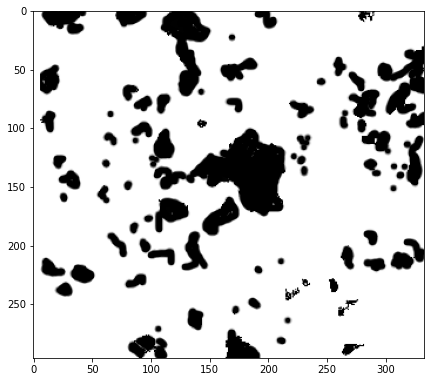

In [7]:
plt.figure(figsize = (7,7))
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB),)

In [8]:
# mask need to be inverted to comply with opencv standards
invert = lambda t: abs(t-255)
v_invert = np.vectorize(invert)

In [9]:
# delete some byproducts of manual mask selection 
def binarizer(x):
        if(x != 0 and x != 255):
            return 0 
        else:
            return x
            
v_binarizer = np.vectorize(binarizer)

In [10]:
inv_mask = v_invert(mask)
inv_mask = v_binarizer(inv_mask)

In [11]:
#check consistency
inv_mask[1:100]

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]])

In [12]:
#comply with opencv types 
inv_mask = np.uint8(inv_mask)

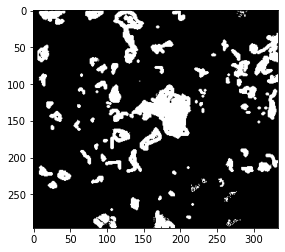

In [13]:
#check the finalized inverted mask
plt.imshow(cv.cvtColor(inv_mask, cv.COLOR_BGR2RGB))

### Alexandru Telea's algorithm 

In [14]:
res_telea = cv.inpaint(img,inv_mask,4,cv.INPAINT_TELEA)

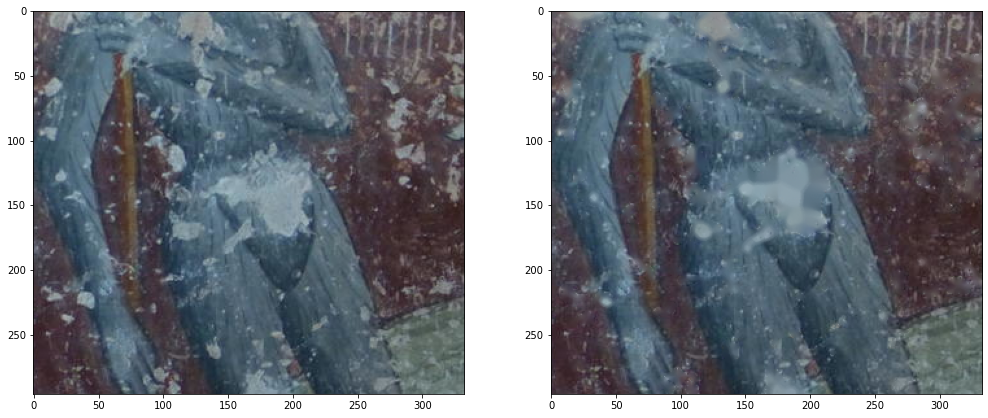

In [15]:
f, axarr = plt.subplots(1,2, figsize=(17,17))
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB),)
axarr[1].imshow(cv.cvtColor(res_telea, cv.COLOR_BGR2RGB),)

In [16]:
plt.imsave('./Telea_Sebastiano_detail2.png',cv.cvtColor(res_telea, cv.COLOR_BGR2RGB))

### "Navier-Stokes, Fluid Dynamics, and Image and Video Inpainting" method

In [17]:
res_NS = cv.inpaint(img,inv_mask,4,cv.INPAINT_NS)

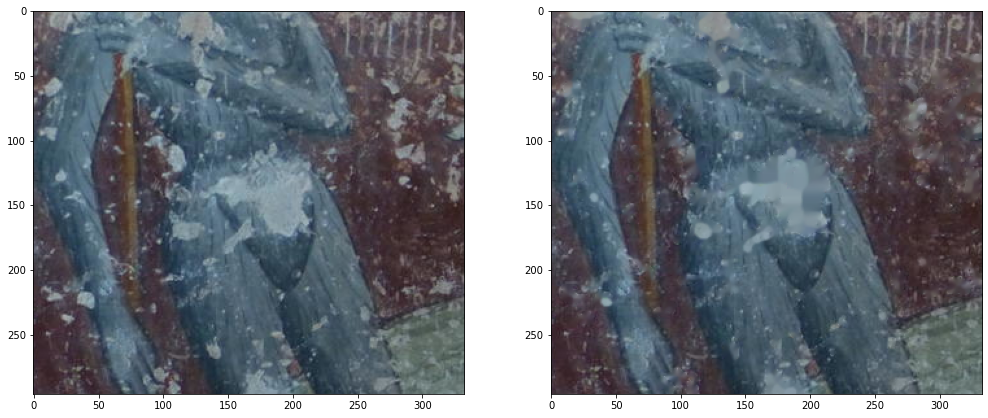

In [18]:
f, axarr = plt.subplots(1,2, figsize=(17,17))
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB),)
axarr[1].imshow(cv.cvtColor(res_NS, cv.COLOR_BGR2RGB),)

In [19]:
plt.imsave('./Sapiro_Sebastiano_detail2.png',cv.cvtColor(res_NS, cv.COLOR_BGR2RGB))